In [41]:
import wbdata
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.collections as col
from matplotlib.colors import Normalize
import cartopy
import cartopy.crs as ccrs
from cartopy.feature import ShapelyFeature
import cartopy.io.shapereader as shpreader
%matplotlib inline

In [42]:
SOURCE = 40
indicators = wbdata.get_indicator(source=SOURCE)

SP.URB.TOTL.IN.ZS	Urban population (% of total)
SP.URB.TOTL      	Urban population
SP.URB.GROW      	Urban population growth (annual %)
SP.RUR.TOTL.ZS   	Rural population (% of total population)
SP.RUR.TOTL.ZG   	Rural population growth (annual %)
SP.RUR.TOTL      	Rural population
SP.POP.TOTL.MA.ZS	Population, male (% of total)
SP.POP.TOTL.MA.IN	Population, male
SP.POP.TOTL.FE.ZS	Population, female (% of total)
SP.POP.TOTL.FE.IN	Population, female
SP.POP.TOTL      	Population, total
SP.POP.GROW      	Population growth (annual %)
SP.POP.DPND.YG   	Age dependency ratio, young (% of working-age population)
SP.POP.DPND.OL   	Age dependency ratio, old (% of working-age population)
SP.POP.DPND      	Age dependency ratio (% of working-age population)
SP.POP.BRTH.MF   	Sex ratio at birth (male births per female births)
SP.POP.AG25.MA.IN	Age population, age 25, male, interpolated
SP.POP.AG25.FE.IN	Age population, age 25, female, interpolated
SP.POP.AG24.MA.IN	Age population, age 24, male, inte

In [43]:
ind = wbdata.get_indicator('SP.POP.GROW')

SP.POP.GROW	Population growth (annual %)


In [44]:
ind

In [45]:
wbdata.search_countries("Bangladesh")

BGD	Bangladesh


In [46]:
wbdata.search_countries("Saudi")

SAU	Saudi Arabia


In [47]:
import datetime
data_dates = (datetime.datetime(2001,1,1), datetime.datetime(2018,1,1))
variable_labels = {'SP.POP.GROW':"Pop Growth Rates"}
data = wbdata.get_dataframe(variable_labels,
                            country=('BGD','SAU'),
                           data_date = data_dates,
                           convert_date=False,
                           keep_levels=True)
data.head()


Pop Growth Rates
country    date                  
Bangladesh 2018               NaN
           2017          1.048898
           2016          1.080165
           2015          1.120144
           2014          1.157188

In [48]:
def country_growth(country_code, indicator, start = 2000, end = 2018):
        import datetime
        import wbdata
        data_dates = (datetime.datetime(start,1,1), datetime.datetime(end,1,1))
        data = wbdata.get_dataframe({indicator:'indicator'}, 
                                country=country_code, 
                                data_date=data_dates, 
                                convert_date=True, 
                                keep_levels=False)
    
        data = data.reset_index()
        return data[['indicator']]

In [49]:
country_growth('BGD','SP.POP.GROW')

,indicator
0,NaN
1,1.048898
2,1.080165
3,1.120144
4,1.157188
5,1.177319
6,1.172435
7,1.151949
8,1.119888
9,1.101990


In [50]:
data = wbdata.get_dataframe({'SP.POP.GROW':'indicator'})
transformed_data = data.reset_index()
transformed_data

,country,date,indicator
0,Arab World,2018,NaN
1,Arab World,2017,1.977892
2,Arab World,2016,2.045601
3,Arab World,2015,2.118210
4,Arab World,2014,2.185197
5,Arab World,2013,2.248844
6,Arab World,2012,2.305073
7,Arab World,2011,2.352527
8,Arab World,2010,2.402393
9,Arab World,2009,2.448201


In [51]:
from __future__ import print_function
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
def f(x):
    return x

interact(f, x=10)

interactive(children=(IntSlider(value=10, description='x', max=30, min=-10), Output()), _dom_classes=('widget-…

<function __main__.f(x)>

In [64]:
country_list = np.unique(transformed_data['country'])
country_list

array(['Afghanistan', 'Albania', 'Algeria', 'American Samoa', 'Andorra',
       'Angola', 'Antigua and Barbuda', 'Arab World', 'Argentina',
       'Armenia', 'Aruba', 'Australia', 'Austria', 'Azerbaijan',
       'Bahamas, The', 'Bahrain', 'Bangladesh', 'Barbados', 'Belarus',
       'Belgium', 'Belize', 'Benin', 'Bermuda', 'Bhutan', 'Bolivia',
       'Bosnia and Herzegovina', 'Botswana', 'Brazil',
       'British Virgin Islands', 'Brunei Darussalam', 'Bulgaria',
       'Burkina Faso', 'Burundi', 'Cabo Verde', 'Cambodia', 'Cameroon',
       'Canada', 'Caribbean small states', 'Cayman Islands',
       'Central African Republic', 'Central Europe and the Baltics',
       'Chad', 'Channel Islands', 'Chile', 'China', 'Colombia', 'Comoros',
       'Congo, Dem. Rep.', 'Congo, Rep.', 'Costa Rica', "Cote d'Ivoire",
       'Croatia', 'Cuba', 'Curacao', 'Cyprus', 'Czech Republic',
       'Denmark', 'Djibouti', 'Dominica', 'Dominican Republic',
       'Early-demographic dividend', 'East Asia & Pacif

/Users/pranay.lolabattu/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/Users/pranay.lolabattu/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/Users/pranay.lolabattu/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/Users/pranay.lolabattu/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/Users/pranay.lolabattu/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/Users/pranay.lolabattu/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/Users/pranay.lo

/Users/pranay.lolabattu/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/Users/pranay.lolabattu/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/Users/pranay.lolabattu/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/Users/pranay.lolabattu/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/Users/pranay.lolabattu/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/Users/pranay.lolabattu/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/Users/pranay.lo

/Users/pranay.lolabattu/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/Users/pranay.lolabattu/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/Users/pranay.lolabattu/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/Users/pranay.lolabattu/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/Users/pranay.lolabattu/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/Users/pranay.lolabattu/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/Users/pranay.lo

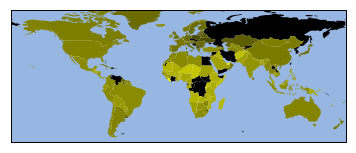

In [91]:
ax = plt.axes(projection=ccrs.PlateCarree())
#ax.add_feature(cartopy.feature.LAND)
ax.add_feature(cartopy.feature.OCEAN)
#ax.add_feature(cartopy.feature.COASTLINE)
#ax.add_feature(cartopy.feature.BORDERS, linestyle='-', alpha=.5)
#ax.add_feature(cartopy.feature.LAKES, alpha=0.95)
#ax.add_feature(cartopy.feature.RIVERS)
ax.set_extent([-150, 60, -25, 60])

shpfilename = shpreader.natural_earth(resolution='110m',
                                      category='cultural',
                                      name='admin_0_countries')
reader = shpreader.Reader(shpfilename)
countries = reader.records()
year = '2000'

for country in countries:
    if country.attributes['BRK_NAME'] in country_list:
        color = transformed_data[transformed_data['country'] == country.attributes['BRK_NAME']][transformed_data['date'] == year]['indicator'].values[0]
        ax.add_geometries(country.geometry, ccrs.PlateCarree(),
                          facecolor=(color/10 + 0.4, color/10 + 0.4, 0),
                          label=country.attributes['SOV_A3'])
    else:
        ax.add_geometries(country.geometry, ccrs.PlateCarree(),
                          facecolor=(0, 0, 0),
                          label=country.attributes['SOV_A3'])

plt.show()

In [84]:
transformed_data[transformed_data['country'] == 'United States'][transformed_data['date'] == year]['indicator'].values[0]

/Users/pranay.lolabattu/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


1.11276899679534